In [8]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [4]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [5]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [6]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


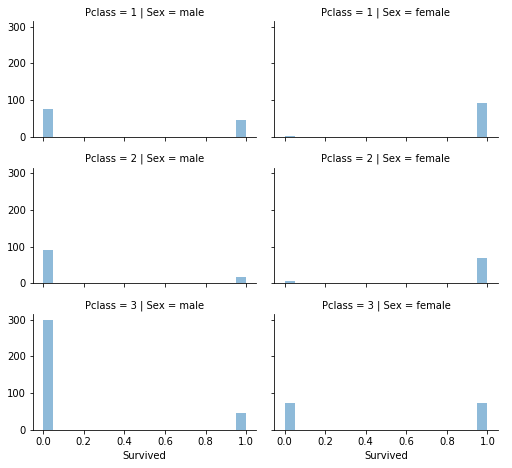

In [14]:
grid = sns.FacetGrid(train_df, col='Sex', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Survived', alpha=.5, bins=20)
grid.add_legend();

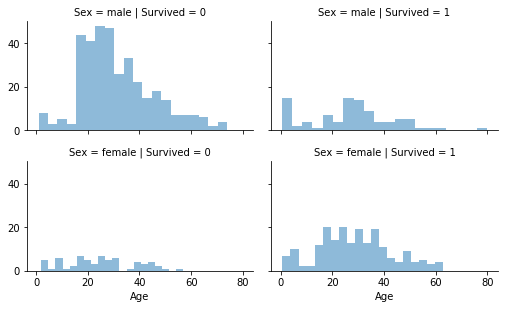

In [18]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


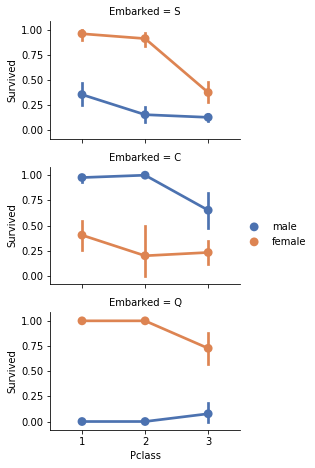

In [17]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

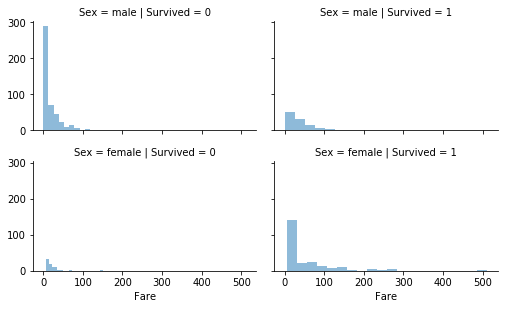

In [34]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Fare', alpha=.5, bins=20)
grid.add_legend();

                                                                                    ---- (die) A 0.004489
                                                                                    |
                                                           --- FARE(Gini = 0.27881) ---- > 10 (live) B 0.02132
                                                           |     
                                                         --- EMBARKED (Gini = 0.2683) ---- != C (live) C 0.13580 
                                                               |
GENDER (Gini = 0.45642) ---- female --- PCLASS (Gini = 0.49657)---- != 3 (live) D 0.19079    
        |
        --- PCLASS (Gini = 0.333456)---- 1 (live) E 0.13692 
                    |
                    --- EMBARKED (Gini = 0.0) ----  == C (live) F 0.0
                                  |
                                  --- FARE (Gini = 0.06784) ---- > 50 (live) G 0.017957
                                            |
                                            ---- (die) H 0.492704 

In [61]:
#train_df = train_df.drop(columns=["PassengerId", "Cabin", "Ticket"])
#train_df = train_df.drop(columns=["Name"])
train_df.iloc[1]

Survived          1
Pclass            1
Sex          female
Age              38
SibSp             1
Parch             0
Fare        71.2833
Embarked          C
Name: 1, dtype: object

In [101]:
# generate the data set that satifies the upper tree
datas = train_df
new = []

A = 0
B = 0
C = 0
D = 0
E = 0
F = 0
G = 0
H = 0

for i in range(891):
    data = datas.iloc[i]
    if data["Sex"] == "female":
        if data["Pclass"] == 3:
            if data["Embarked"] == "C":
                if data["Fare"] < 10:
                    data["Survived"] = 0
                    A = A + 1
                else:
                    data["Survived"] = 1
                    B = B + 1
            else:
                data["Survived"] = 1
                C = C + 1
        else:
            data["Survived"] = 1
            D = D + 1
    else:
        if data["Pclass"] != 1:
            if data["Embarked"] != "c":
                if data["Fare"] < 50:
                    data["Survived"] = 0
                    H = H + 1
                else:
                    data["Survived"] = 1
                    G = G + 1
            else:
                data["Survived"] = 1
                F = F + 1
        else:
            data["Survived"] = 1
            E = E + 1
    new.append(data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/

In [98]:
from_a_to_g = [A/891, B/891, C/891, D/891, E/891, F/891, G/891, H/891]
print(from_a_to_g)

[0.004489337822671156, 0.02132435465768799, 0.13580246913580246, 0.19079685746352412, 0.13692480359147025, 0.0, 0.017957351290684626, 0.49270482603815935]


In [85]:
pd_new = pd.DataFrame(new)

sex_map = {'male' : 0, 'female' :1}
pd_new['Sex'] = pd_new['Sex'].map(sex_map)

Embarked_map = {'S' : 0, 'C' :1, 'Q':2}
pd_new['Embarked'] = pd_new['Embarked'].map(Embarked_map)

age = pd_new['Age']
avgage = age.sum(axis = 0, skipna = True) /len(age)
pd_new['Age'].fillna(avgage, inplace = True)

pd_new['Embarked'].fillna(2, inplace = True)


train = pd_new.drop(columns=["Survived"])
y = pd_new["Survived"]



In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz

import pydotplus

In [99]:
dtree=DecisionTreeClassifier(max_depth=5)
dtree.fit(train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(train),
                class_names=['die','survive'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

In [100]:
dtree.feature_importances_

array([0.40206626, 0.51089887, 0.        , 0.        , 0.        ,
       0.08344329, 0.00359158])

# Generated Tree
![caption](files/tree.png)

# Origin Tree
![caption](files/org_tree.png)

# Comparision
## structure
* the generated on only has four layers instead of five
* the left side of the generated tree is very different from the original one. it statrt with Fare instead of Pclass
* the right side is more similar, only missing the layer of "Embarked"

## Gini purity
* in the left hand side of the origin tree, you can see that the gini purity of "Embarked" is zero. And this is probably the reason why the generated tree skip this layar and use "Fare" instead.
* "Pclass" in the right hand side of thee origin tree,  the gini purity is 0.49 which is preaty terrible. Due to it's inpurity, the generated one does not has this layer. instead it started with "Fare" with gini purity of 0.025.